In [3]:
#pip install httplib2 uncomment to install

     |████████████████████████████████| 95 kB 1.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [27]:
import httplib2
import requests
import pandas as pd
import lxml.html as html
from bs4 import BeautifulSoup, SoupStrainer

In [29]:
http = httplib2.Http()
status, response = http.request('https://access.vault.com/best-jobs-and-career-guidance')

links = []
url = '/industries-professions/professions/'
url_prefix = 'https://access.vault.com'

for link in BeautifulSoup(response, 'html.parser', parse_only=SoupStrainer('a')):
    if link.has_attr('href'):
        if url in link['href']:
            links.append(url_prefix + link['href'])
    
print("Total Careers: {}".format(len(links)))

Total Careers: 1097


In [30]:
def getTraits(URL):
    page=requests.get(URL)
    
    soup = BeautifulSoup(page.content, 'html.parser')
    career = soup.select('h1')[0].text.replace('\r', '').replace('\n', '').strip()
    
    trait1 = soup.find_all("div", class_="icon")
    result = []
    
    for i in range(len(trait1)):
        trait = trait1[i].find("p")
        if trait != None:       
            result.append(trait.getText())
        
        if len(result) == 3:
            break
    
    return result

In [34]:
traits = getTraits('https://www.vault.com/industries-professions/professions/m/military-workers-officers')  
print(traits)

# page=requests.get('https://www.vault.com/industries-professions/professions/m/military-workers-officers')

# soup = BeautifulSoup(page.content, 'html.parser')
# career = soup.select('h1')[0].text.replace('\r', '').replace('\n', '').strip()
# # print(career)

# trait1 = soup.find_all("div", class_="icon")
# # for trait in trait1:
# #     print(trait)
# #     print()
# for i in range(len(trait1)):
#     trait = trait1[i].find("p")
#     if trait != None:       
#         print(trait.getText())
# # print(trait1[4].find('p').getText())
# # print(trait1[5].find('p').getText())
# # print(trait1[6].find('p').getText())

['Enterprising', 'Organized', 'Problem-Solving']


In [35]:
traits = {}

for career in links:
    p_traits = getTraits(career)

    for trait in p_traits:
        if trait in traits.keys():
            traits[trait] = traits[trait] + 1
        else:
            traits[trait] = 1

In [38]:
sortedTraits = {k: v for k, v in sorted(traits.items(), key=lambda item: item[1], reverse=True)}
for key, value in sortedTraits.items():
    if value != 1:
        print('{}: {}'.format(key,value))

Problem-Solving: 459
Hands On: 380
Technical: 372
Organized: 350
Helpful: 269
Conventional: 215
Realistic: 200
Outgoing: 191
Scientific: 178
Enterprising: 174
Creative: 142
Curious: 99
Social: 98
Artistic: 81
Athletic: 59
Talkative: 23


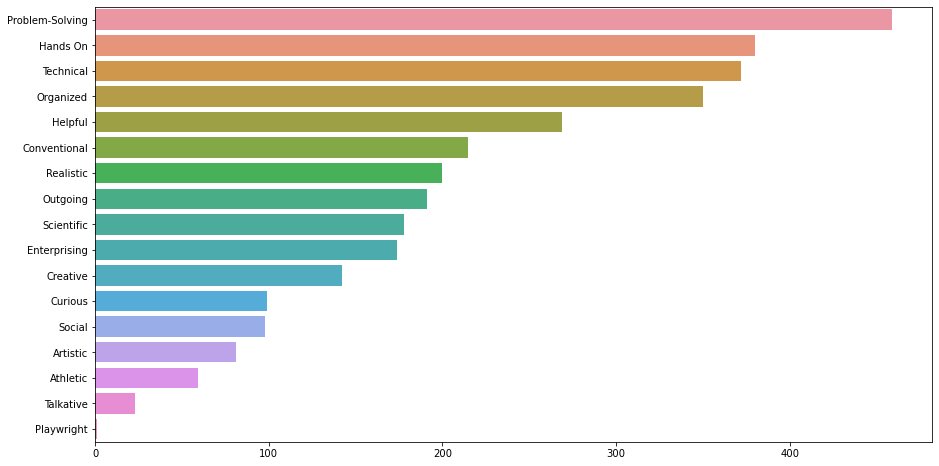

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

x_career=list(sortedTraits.keys())
y_count=list(sortedTraits.values())

plt.figure(figsize=(15,8))
sns.barplot(x=y_count, y=x_career)
plt.show()